# Statistic analisis of Order 

Analysis of the year of orders using Order class.

In [9]:
pip install matplotlib


  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.5-cp37-cp37m-win_amd64.whl.metadata (6.5 kB)
  Using cached Pillow-9.5.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached typing_extensions-4.7.1-py3-none-any.whl.metadata (3.1 kB)
Using cached kiwisolver-1.4.5-cp37-cp37m-win_amd64.whl (55 kB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
#import pandas, numpy, matplotlib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import json

#import Order Class
from module.Order_Class import Order


1. Import the data from the file in your notebook and create the Order objects

In [2]:
# Load the JSON data
with open('data/json_files/orders_history.json', 'r', encoding='cp1252') as file:
    data = json.load(file)

orders_data = data["orders"]

# Iterate through the orders and create instances of the Order class
orders_list = []
for order in orders_data:
    items = order["items"]
    date = order["date"]

    order_instance = Order(items, date)
    orders_list.append(order_instance)

# Example usage of the orders
for order in orders_list:
    print(f"Order ID: {order.order_id}, Date: {order.date}, Items: {order.items}, Calories: {order.calories}, Price: {order.price}")


Order ID: order--1, Date: 2022-01-01, Items: ['meal-2', 'meal-6', 'meal-5'], Calories: 995, Price: 14
Order ID: order--2, Date: 2022-01-01, Items: ['meal-5', 'combo-3', 'combo-3'], Calories: 1140, Price: 23
Order ID: order--3, Date: 2022-01-01, Items: ['meal-3', 'combo-2', 'combo-1'], Calories: None, Price: None
Order ID: order--4, Date: 2022-01-01, Items: ['combo-1', 'combo-3'], Calories: 1525, Price: 21
Order ID: order--5, Date: 2022-01-01, Items: ['meal-2', 'combo-2'], Calories: 1450, Price: 17
Order ID: order--6, Date: 2022-01-01, Items: ['meal-3', 'meal-7', 'meal-8'], Calories: 560, Price: 10
Order ID: order--7, Date: 2022-01-01, Items: ['meal-5', 'combo-2'], Calories: 930, Price: 13
Order ID: order--8, Date: 2022-01-01, Items: ['meal-4', 'combo-3', 'combo-3'], Calories: 1260, Price: 26
Order ID: order--9, Date: 2022-01-01, Items: ['meal-4', 'combo-1'], Calories: 1420, Price: 17
Order ID: order--10, Date: 2022-01-01, Items: ['meal-1', 'meal-7', 'meal-8', 'combo-2'], Calories: 1460

2. Create a Data Frame to store the data


In [3]:
'''
Labels of the columns in the DataFrame:
- order_id (str): A unique identifier for the order.
- order_accepted (bool): Whether or not the order was accepted.
- order_refused_reason (str): The reason the order was refused.
- date (datetime): The date and time of the order.
- items (list): A list of item ids.
- calories (int): The total calories for the order.
- price (int): The total price for the order.
'''
order_dicts = [] 
for order in orders_list:
    order_dict = {
        "order_id": order.order_id,
        "order_accepted": order.order_accepted,
        "order_refused_reason": order.order_refused_reason,
        "date": order.date,
        "items": order.items,
        "calories": order.calories,
        "price": order.price
    }
    order_dicts.append(order_dict)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(order_dicts)

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])
df

order_id  order_accepted  \
0          order--1            True   
1          order--2            True   
2          order--3           False   
3          order--4            True   
4          order--5            True   
...             ...             ...   
36914  order--36915            True   
36915  order--36916            True   
36916  order--36917            True   
36917  order--36918            True   
36918  order--36919           False   

                            order_refused_reason       date  \
0                                           None 2022-01-01   
1                                           None 2022-01-01   
2      Too many calories: 2170; maximum is 2000. 2022-01-01   
3                                           None 2022-01-01   
4                                           None 2022-01-01   
...                                          ...        ...   
36914                                       None 2022-12-31   
36915                                       None 2022-12-31   
36916                                       None 2022-12-31   
36917                                       None 2022-12-31   
36918  Too many calories: 2120; maximum is 2000. 2022-12-31   

                                   items  calories  price  
0               [meal-2, meal-6, meal-5]     995.0   14.0  
1             [meal-5, combo-3, combo-3]    1140.0   23.0  
2             [meal-3, combo-2, combo-1]       NaN    NaN  
3                     [combo-1, combo-3]    1525.0   21.0  
4                      [meal-2, combo-2]    1450.0   17.0  
...                                  ...       ...    ...  
36914  [meal-8, meal-1, meal-8, combo-2]    1480.0   19.0  
36915           [meal-5, meal-6, meal-5]     475.0   10.0  
36916  [meal-6, meal-4, meal-3, combo-1]    1835.0   27.0  
36917                  [meal-1, combo-3]    1055.0   15.0  
36918         [meal-4, combo-1, combo-2]       NaN    NaN  

[36919 rows x 7 columns]

Delete the rows with the None value, which are the rows that got the error: **MealTooBigError, MealOutOfTheMenu**

In [4]:
df.dropna(subset=['calories', 'price'], inplace=True)
df

order_id  order_accepted order_refused_reason       date  \
0          order--1            True                 None 2022-01-01   
1          order--2            True                 None 2022-01-01   
3          order--4            True                 None 2022-01-01   
4          order--5            True                 None 2022-01-01   
5          order--6            True                 None 2022-01-01   
...             ...             ...                  ...        ...   
36913  order--36914            True                 None 2022-12-31   
36914  order--36915            True                 None 2022-12-31   
36915  order--36916            True                 None 2022-12-31   
36916  order--36917            True                 None 2022-12-31   
36917  order--36918            True                 None 2022-12-31   

                                   items  calories  price  
0               [meal-2, meal-6, meal-5]     995.0   14.0  
1             [meal-5, combo-3, combo-3]    1140.0   23.0  
3                     [combo-1, combo-3]    1525.0   21.0  
4                      [meal-2, combo-2]    1450.0   17.0  
5               [meal-3, meal-7, meal-8]     560.0   10.0  
...                                  ...       ...    ...  
36913                           [meal-6]      15.0    4.0  
36914  [meal-8, meal-1, meal-8, combo-2]    1480.0   19.0  
36915           [meal-5, meal-6, meal-5]     475.0   10.0  
36916  [meal-6, meal-4, meal-3, combo-1]    1835.0   27.0  
36917                  [meal-1, combo-3]    1055.0   15.0  

[33039 rows x 7 columns]

# **QUESTION TO SAM**: the calories and price of the meals greater then 2000 are not calculated - Is it ok? (I'm not sure because the None can influance the average income etc.)

## Exercise 1. 
Display a graph of **Total Calories per Day.** 

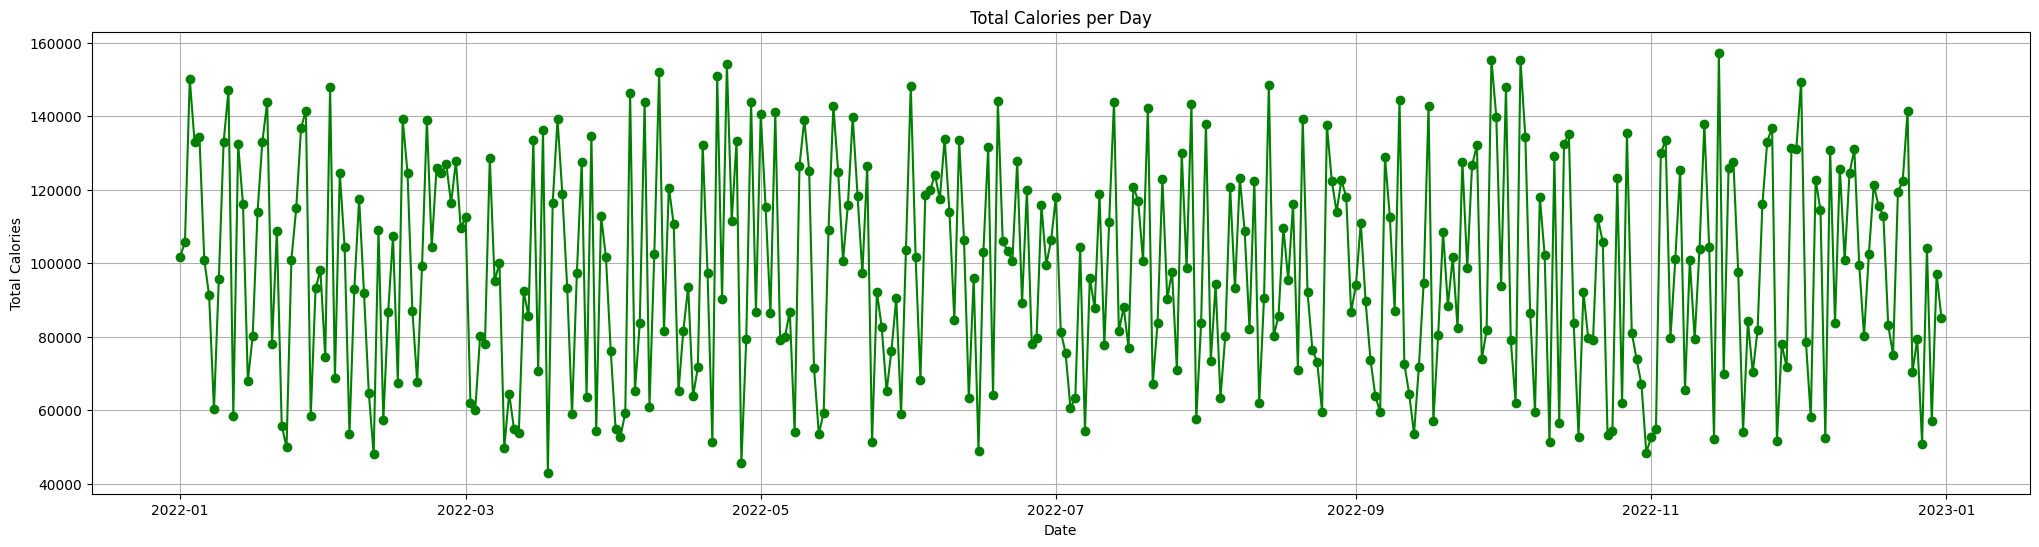

In [5]:
# create the table of total calories per day
daily_calories = df.groupby('date')['calories'].sum().reset_index()

# Plotting the table
plt.figure(figsize=(25, 6))
plt.plot(daily_calories['date'], daily_calories['calories'], marker='o',color='green')
plt.title('Total Calories per Day')
plt.xlabel('Date')
plt.ylabel('Total Calories')
plt.grid(True)
plt.show()

## Exercise 2.
Display a graph of **Total earnings per day**

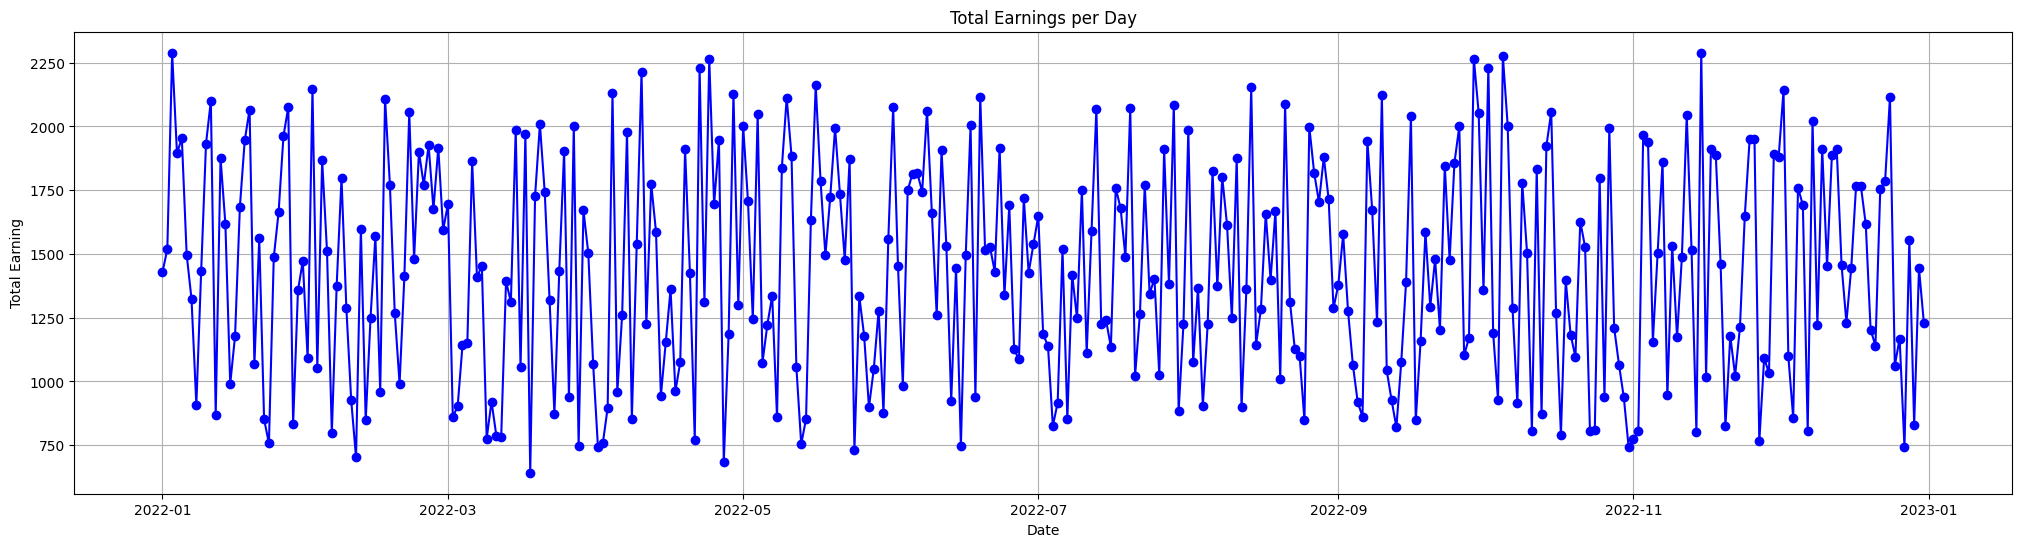

In [6]:
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# create the table of total earnings per day
daily_earnings = df.groupby('date')['price'].sum().reset_index()

# Plotting the table
plt.figure(figsize=(25, 6))
plt.plot(daily_earnings['date'], daily_earnings['price'], marker='o',color='blue')
plt.title('Total Earnings per Day')
plt.xlabel('Date')
plt.ylabel('Total Earning')
plt.grid(True)
plt.show()

## Exercise 3.

Display a graph of **Average earnings by customer served per day**

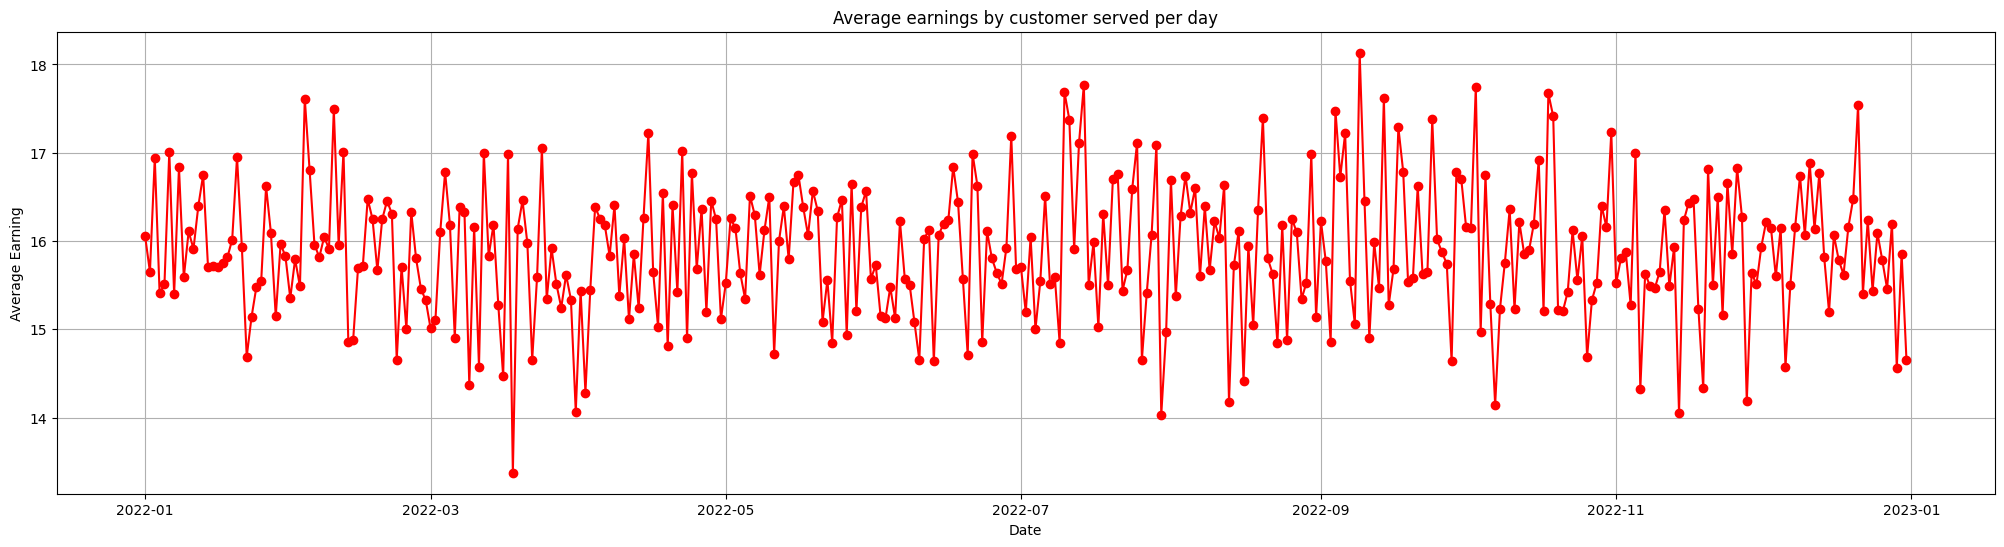

In [7]:
# create the table of average earnings by customer served per day
daily_earnings_per_person = df.groupby('date')['price'].sum().reset_index()
daily_earnings_per_person['number_of_guest'] = df.groupby('date').size().values
daily_earnings_per_person['earnings_per_person'] = daily_earnings_per_person['price']/daily_earnings_per_person['number_of_guest']

# Plotting the table
plt.figure(figsize=(25, 6))
plt.plot(daily_earnings_per_person['date'], daily_earnings_per_person['earnings_per_person'], marker='o',color='red')
plt.title('Average earnings by customer served per day')
plt.xlabel('Date')
plt.ylabel('Average Earning')
plt.grid(True)
plt.show()

## Exercise 4.
Find the value of **the Most ordered meals**

**the Most ordered item from all meals and combos**

In [8]:
# function to find most frequent element in a list
def most_frequent(List):
    return max(set(List), key = List.count)

#create the list of all items ordered
all_items = []
for items in df['items']:
    all_items.extend(items)

#find the most frequnect item in the list all_items
max_item = most_frequent(all_items)

#print the answer
print(f'The most often ordered item from both meals and orders is: {max_item}')

The most often ordered item from both meals and orders is: combo-3


other way:

In [17]:
pd.Series(all_items).value_counts()

combo-3    11869
combo-2    11142
combo-1     7410
meal-6      6724
meal-7      6682
meal-8      6628
meal-5      6435
meal-4      6348
meal-3      6217
meal-1      5689
meal-2      5207
dtype: int64

**the Most ordered meal**

In [10]:
#extract only meals from all_items ordered
#from the list of all items orders extract only combos
all_meals = [item for item in all_items if 'meal' in item]

#find the most frequnect item in the list all_items
max_meal = most_frequent(all_meals)

#print the answer
print(f'The most often ordered meal is: {max_meal}')

The most often ordered meal is: meal-6


In [11]:
pd.Series(all_meals).value_counts()

meal-6    6724
meal-7    6682
meal-8    6628
meal-5    6435
meal-4    6348
meal-3    6217
meal-1    5689
meal-2    5207
dtype: int64

## Exercise 5.

Find the value of the **Most ordered combo**

In [12]:
#from the list of all items orders extract only combos
all_combos = [item for item in all_items if 'combo' in item]

#find the most frequnect item in the list all_items
max_combo = most_frequent(all_combos)

#print the answer
print(f'The most often ordered meal is: {max_combo}')

The most often ordered meal is: combo-3


In [13]:
pd.Series(all_combos).value_counts()

combo-3    11869
combo-2    11142
combo-1     7410
dtype: int64

## Exercise 6.

Display **Combo or meal that brought the most money**


- Meal that brought the most money 

In [28]:
from data.read_data_files.data_advanced_dict import menus_advanced

#create the Series of meals and frequency
frequency_of_items = pd.Series(all_meals).value_counts().reset_index()
frequency_of_items.columns = ['Meal name', 'Frequency']

#calculate earnings for each of the meals
earnings = []
for item in range(len(frequency_of_items['Meal name'])):
    earnings.append(frequency_of_items['Frequency'][item] * menus_advanced[frequency_of_items['Meal name'][item]]['price'])
frequency_of_items['Earnings'] = earnings

#sort
df_meals = frequency_of_items.sort_values(by='Earnings', ascending=False)

df_meals

Meal name  Frequency  Earnings
4    meal-4       6348     38088
5    meal-3       6217     37302
7    meal-2       5207     36449
6    meal-1       5689     28445
0    meal-6       6724     26896
3    meal-5       6435     19305
1    meal-7       6682     13364
2    meal-8       6628     13256

- Combo that brought the most money

In [30]:
from data.read_data_files.data_advanced_dict import combos_advanced

#create the Series of combos and frequency
frequency_of_items = pd.Series(all_combos).value_counts().reset_index()
frequency_of_items.columns = ['Combo name', 'Frequency']

#calculate earnings for each of the combos
earnings = []
for item in range(len(frequency_of_items['Combo name'])):
    earnings.append(frequency_of_items['Frequency'][item] * combos_advanced[frequency_of_items['Combo name'][item]]['price'])
frequency_of_items['Earnings'] = earnings

#sort
df_combos = frequency_of_items.sort_values(by='Earnings', ascending=False)

df_combos

Combo name  Frequency  Earnings
0    combo-3      11869    118690
1    combo-2      11142    111420
2    combo-1       7410     81510